# Modelado de una inundación

El modelo matemático mediante el cual las inundaciones pueden ser modeladas es un sistema de ecuaciones diferenciales parciales no lineales de segundo orden. 


Presento un problema de valor inicial simplificado que pueden encontrar a detalle [aquí](https://noticyti.com/opinion/1708-tabasco-cr%C3%B3nica-de-una-inundaci%C3%B3n-anunciada.html).


$$\dfrac{dh}{dt}=-\rho g\dfrac{h^4}{\eta L^2}$$ $$h(0)=h_o$$ 

La ecuación anterior nos permite modelar el cambio del nivel del agua conforme transcurre el tiempo, donde $h_o$ es su altura inicial; $\rho$, la densidad del agua; $\eta$, el coeficiente de viscocidad; $g$, la aceleración de la gravedad y $L$ es la longitud de una región plana horizontal.


![regionplana.png](regionplana.png)

$$\displaystyle \int \dfrac{1}{h⁴}dh=\displaystyle \int -\rho g\dfrac{1}{\eta L^2}dt$$

$$-\dfrac{h^{-3}}{3}=-\dfrac{\rho g}{\eta L^2}t+k$$

Si evaluamos las condiciones iniciales, tenemos que $k=\dfrac{1}{h_o³}$, por lo que

$$-\dfrac{h^{-3}}{3}=-\dfrac{\rho g}{\eta L^2}t+\dfrac{1}{h_o³}$$

Despejando $h$ de la ecuación anterior nos queda:

$$h=\left(\dfrac{1}{\dfrac{3 \rho gt}{\eta l^2}+\dfrac{1}{h_o³}}\right)^{1/3}$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

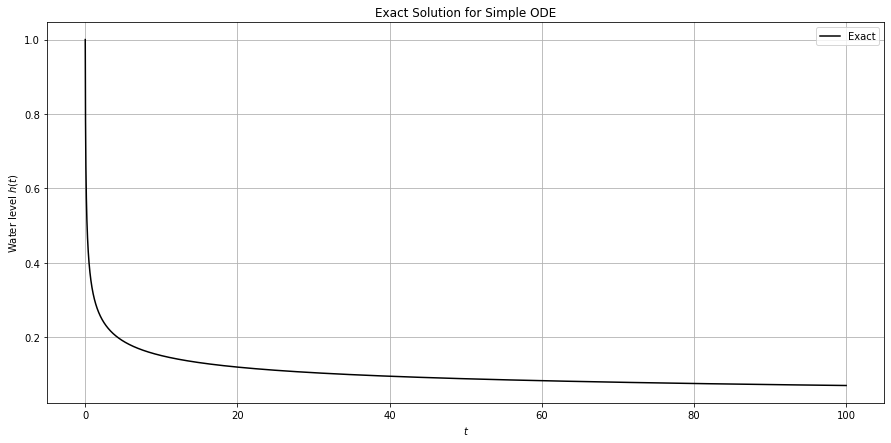

In [2]:
t = np.linspace(0,100,1000000)
# Define parameters
rho = 1000 # densidad del agua
g   = 9.8 
eta = 0.001 # coeficiente de viscosidad del agua
h0  = 1 # altura inicial del agua
L   = 1000 # metros de estudio
exc  = lambda t: (1 / ((3*rho*g/(eta*L**2))*t + (1/h0**3)))**(1/3) # solucion exacta  

plt.figure(figsize = (15, 7))
plt.plot(t, exc(t), 'k', label='Exact')
plt.title('Exact Solution for Simple ODE')
plt.xlabel('$t$')
plt.ylabel('Water level $h(t)$')
plt.grid()
plt.legend(loc='upper right')
plt.show()

### Método de Runge Kutta

Utilizamos `scipy.integrate.solve_ivp` de scipy con el método `RK23`.

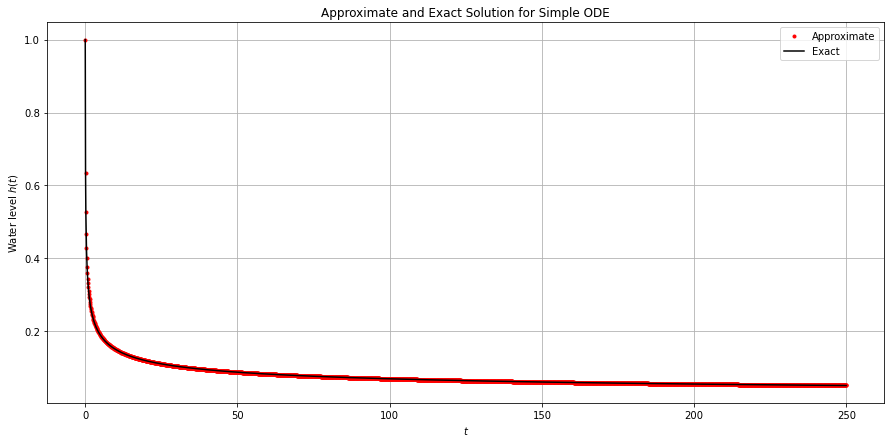

In [3]:
# Define parameters
rho = 1000 # densidad del agua
g   = 9.8 
eta = 0.001 # coeficiente de viscosidad del agua
h0  = 1 # altura inicial del agua
L   = 1000 # metros de estudio
f = lambda t,h: -rho*g*h**4/(eta*L**2)
exc  = lambda t: (1 / ((3*rho*g/(eta*L**2))*t + (1/h0**3)))**(1/3) # solucion exacta  
  
t_eval = np.arange(0,250,0.1)
sol_n = solve_ivp(f, [0, 250], [1], t_eval=t_eval)

plt.figure(figsize = (15, 7))
plt.plot(sol_n.t, sol_n.y[0], '.r', label='Approximate',lw=0.5)
plt.plot(sol_n.t, exc(sol_n.t), 'k', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('$t$')
plt.ylabel('Water level $h(t)$')
plt.grid()
plt.legend(loc='upper right')
plt.show()

Escala logarítmica eje t
Montar otros RK

### Método de Euler

In [4]:
#prof
def odeEuler(f,y0,t):
    '''Approximate the solution of y'=f(y,t) by Euler's method.

    Parameters
    ----------
    f : function
        Right-hand side of the differential equation y'=f(t,y), y(t_0)=y_0
    y0 : number
        Initial value y(t0)=y0 wher t0 is the entry at index 0 in the array t
    t : array
        1D NumPy array of t values where we approximate y values. Time step
        at each iteration is given by t[n+1] - t[n].

    Returns
    -------
    y : 1D NumPy array
        Approximation y[n] of the solution y(t_n) computed by Euler's method.
    '''
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
    return y

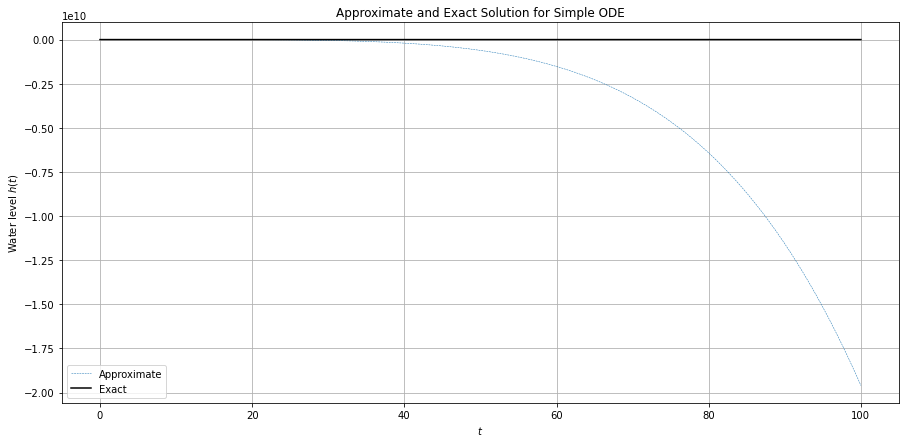

In [5]:
t = np.linspace(0,100,1000000)
# Define parameters
rho = 1000 # densidad del agua
g   = 9.8 
eta = 0.001 # coeficiente de viscosidad del agua
h0  = 1 # altura inicial del agua
L   = 1000 # metros de estudio
f = lambda t,h: -rho*g*h**4/(eta*L**2)
exc  = lambda t: (1 / ((3*rho*g/(eta*L**2))*t + (1/h0**3)))**(1/3) # solucion exacta  
y = odeEuler(f,h0,t)

plt.figure(figsize = (15, 7))
plt.plot(t, y, '--', label='Approximate',lw=0.5)
plt.plot(t, exc(t), 'k', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('$t$')
plt.ylabel('Water level $h(t)$')
plt.grid()
plt.legend(loc='lower left')
plt.show()